## APPLICATIONS OF ML ALGORITHMS ON PROPERTY DATASET

This projects consist of 3 parts. Part 1 of the project is a predictive analysis of housing prices, part 2 consist of a classification model to predict the property type, part 3 consist of cluster analysis to cluster the properties based on latitide and longitude.

Here are the details about the dataset used for this project:

Suburb: Name of the suburb where the property is located

Address: Street address of the property

Rooms: Number of rooms in the property (excluding bathrooms and other non-living spaces)

Type: Type of property (e.g., h = house, t = townhouse, u = unit/apartment)

Price: Sale price of the property in Australian dollars (AUD)

Method: Method of sale (e.g., S = property sold, SP = property sold prior, PI = property passed in, PN = sold prior not disclosed, SN = sold not disclosed, VB = vendor bid, W = withdrawn prior to auction, SA = sold after auction)

SellerG: Real estate agency or agent handling the sale

Date: Date of the sale

Distance: Distance from the property to Melbourne central business district (CBD) in kilometers

Postcode

Bedroom: Number of bedrooms in the property (including any non-living spaces that could be used as bedrooms)

Bathroom: Number of bathrooms in the property

Car_space: Number of car spaces associated with the property

Landsize: Land size of the property in square meters

BuildingArea: Total building area of the property in square meters

YearBuilt

CouncilArea: Name of the local government area where the property is located

Lattitude

Longtitude

Regionname: Name of the region where the property is located (e.g., Eastern Metropolitan, Northern Metropolitan, Southern Metropolitan, Western Metropolitan)

Propertycount: Number of properties that exist in the suburb

## IMPORTING THE DATASET

In [1]:
import pandas as pd
data=pd.read_csv('C:/Users/HP/Desktop/PROJECT/PROPERTY SALES/property sales.csv')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car_space,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03-12-2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04-02-2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04-03-2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04-03-2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04-06-2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18395 entries, 0 to 18394
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         18395 non-null  object 
 1   Address        18395 non-null  object 
 2   Rooms          18395 non-null  int64  
 3   Type           18395 non-null  object 
 4   Price          18395 non-null  int64  
 5   Method         18395 non-null  object 
 6   SellerG        18395 non-null  object 
 7   Date           18395 non-null  object 
 8   Distance       18394 non-null  float64
 9   Postcode       18394 non-null  float64
 10  Bedroom        14926 non-null  float64
 11  Bathroom       14924 non-null  float64
 12  Car_space      14819 non-null  float64
 13  Landsize       13602 non-null  float64
 14  BuildingArea   7762 non-null   float64
 15  YearBuilt      8958 non-null   float64
 16  CouncilArea    12232 non-null  object 
 17  Lattitude      15063 non-null  float64
 18  Longti

In [3]:
#to check if there is any null values
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           3469
Bathroom          3471
Car_space         3576
Landsize          4793
BuildingArea     10633
YearBuilt         9437
CouncilArea       6163
Lattitude         3332
Longtitude        3332
Regionname           1
Propertycount        1
dtype: int64

In [4]:
#dropping the unnecessary columns from the dataset
data.drop(['SellerG','Postcode','Address'],axis=1,inplace=True)

In [5]:
#filling the null values
data['BuildingArea'] = data['BuildingArea'].fillna(data['BuildingArea'].median())
data['YearBuilt'] = data['YearBuilt'].fillna(data['YearBuilt'].median())
data['CouncilArea'] = data['CouncilArea'].fillna(data['CouncilArea'].mode()[0])
data['Distance'] = data['Distance'].fillna(data['Distance'].mean())
data['Bedroom'] = data['Bedroom'].fillna(data['Bedroom'].mean())
data['Bathroom'] = data['Bathroom'].fillna(data['Bathroom'].mean())
data['Car_space'] = data['Car_space'].fillna(data['Car_space'].mean())
data['Landsize'] = data['Landsize'].fillna(data['Landsize'].mean())
data.isnull().sum()

Suburb              0
Rooms               0
Type                0
Price               0
Method              0
Date                0
Distance            0
Bedroom             0
Bathroom            0
Car_space           0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         0
Lattitude        3332
Longtitude       3332
Regionname          1
Propertycount       1
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
Date             0
Distance         0
Bedroom          0
Bathroom         0
Car_space        0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

## DATA VISUALIZATION

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

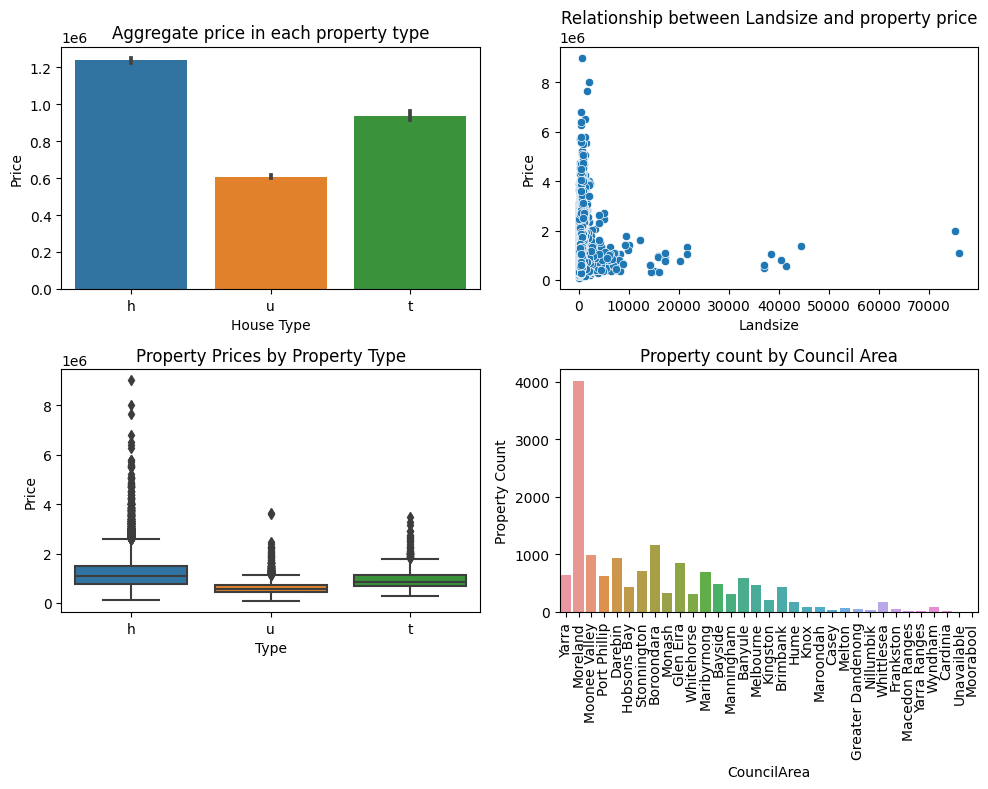

In [9]:
fig,axes=plt.subplots(2,2,figsize=(10,8))

sns.barplot(x='Type',y='Price',data=data,ax=axes[0][0])
axes[0][0].set_xlabel('House Type')
axes[0][0].set_title('Aggregate price in each property type')

sns.scatterplot(x='Landsize',y='Price',data=data,ax=axes[0][1])
axes[0][1].set_title('Relationship between Landsize and property price')

sns.boxplot(x='Type',y='Price',data=data,ax=axes[1][0])
axes[1][0].set_title('Property Prices by Property Type')

sns.countplot(x='CouncilArea',data=data,ax=axes[1][1])
axes[1][1].set_title('Property count by Council Area')
axes[1][1].set_xlabel('CouncilArea')
axes[1][1].set_ylabel('Property Count')
axes[1][1].set_xticklabels(axes[1][1].get_xticklabels(), rotation=90)

plt.tight_layout()

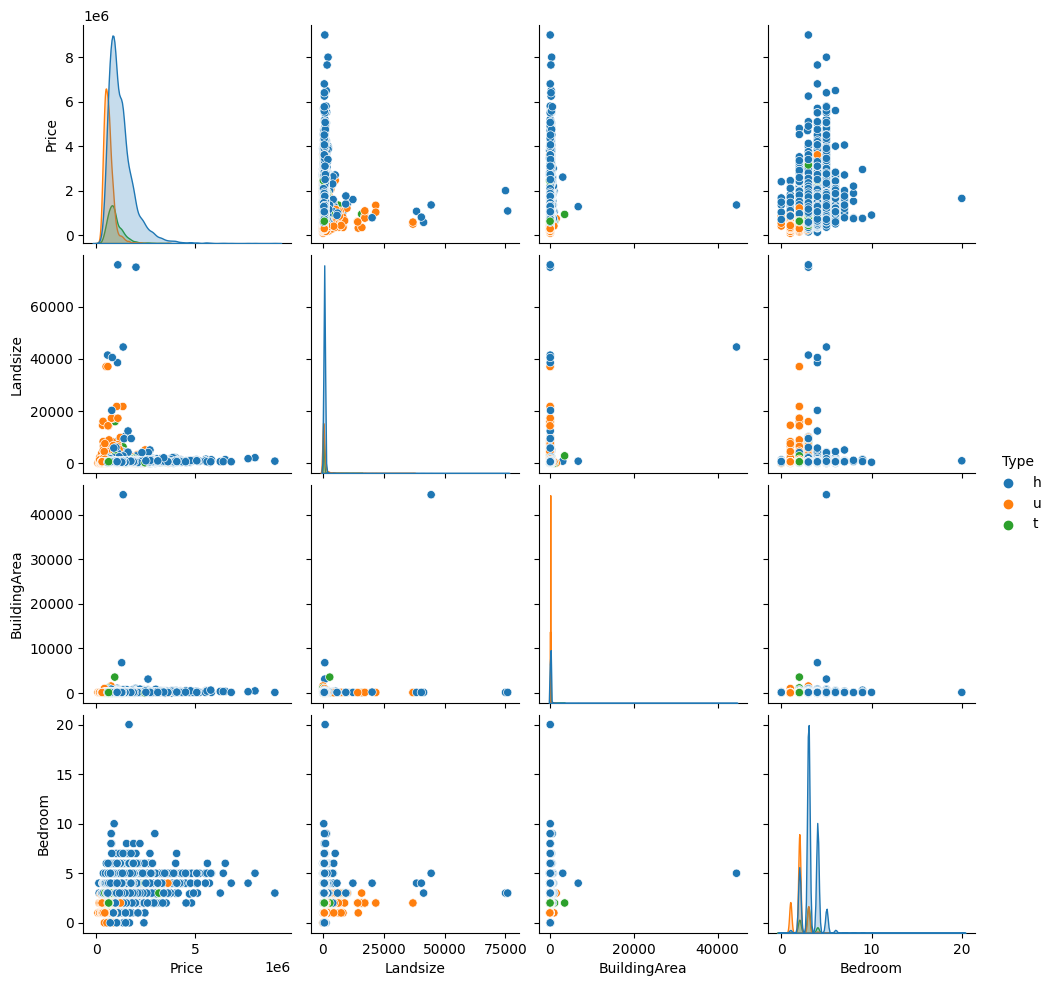

In [10]:
numerical_features=['Price','Landsize','BuildingArea','Bedroom']
sns.pairplot(data, vars=numerical_features,hue='Type')
plt.show()

## DATA PRE-PROCESSING 

In [11]:
#one-hot encoder
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data['Type']=label.fit_transform(data['Type'])
data['CouncilArea']=label.fit_transform(data['CouncilArea'])
data['Suburb']=label.fit_transform(data['Suburb'])
data['Regionname']=label.fit_transform(data['Regionname'])
data['Method']=label.fit_transform(data['Method'])

In [12]:
#correlation
df=data.drop('Date',axis=1)
df.corr()

,Suburb,Rooms,Type,Price,Method,Distance,Bedroom,Bathroom,Car_space,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Suburb,1.000000,-0.059495,0.021159,-0.132723,0.009615,-0.036495,-0.055005,-0.056561,-0.030733,0.009238,-0.005920,0.016614,0.040508,0.136041,-0.139102,-0.008471,0.146762
Rooms,-0.059495,1.000000,-0.558201,0.496405,-0.047146,0.289523,0.936385,0.589621,0.406814,0.064501,0.093497,-0.047162,-0.099116,0.020551,0.093679,-0.033034,-0.083568
Type,0.021159,-0.558201,1.000000,-0.413803,0.076719,-0.235083,-0.535970,-0.238187,-0.277334,-0.032395,-0.053868,0.253022,0.058089,-0.108583,0.009018,0.066816,0.087198
Price,-0.132723,0.496405,-0.413803,1.000000,-0.031480,-0.170551,0.472135,0.460968,0.236130,0.044520,0.071513,-0.256732,-0.091943,-0.203934,0.196838,0.074201,-0.044083
Method,0.009615,-0.047146,0.076719,-0.031480,1.000000,-0.051794,-0.045134,-0.001648,-0.021146,-0.001154,-0.007602,0.020098,0.031168,-0.007760,-0.031144,0.017246,-0.026332
Distance,-0.036495,0.289523,-0.235083,-0.170551,-0.051794,1.000000,0.292209,0.129508,0.257201,0.089774,0.069938,0.196013,-0.119701,-0.133604,0.233686,-0.100952,-0.054987
Bedroom,-0.055005,0.936385,-0.535970,0.472135,-0.045134,0.292209,1.000000,0.589828,0.409215,0.064868,0.092379,-0.037582,-0.090297,0.018251,0.096905,-0.038745,-0.079676
Bathroom,-0.056561,0.589621,-0.238187,0.460968,-0.001648,0.129508,0.589828,1.000000,0.325128,0.052703,0.089920,0.117932,-0.052266,-0.064621,0.116774,0.017897,-0.050092
Car_space,-0.030733,0.406814,-0.277334,0.236130,-0.021146,0.257201,0.409215,0.325128,1.000000,0.083311,0.068585,0.081129,-0.112057,-0.003919,0.063359,0.013619,-0.023092
Landsize,0.009238,0.064501,-0.032395,0.044520,-0.001154,0.089774,0.064868,0.052703,0.083311,1.000000,0.256182,0.020821,0.002033,0.021490,0.029679,-0.020278,-0.009993


<Axes: >

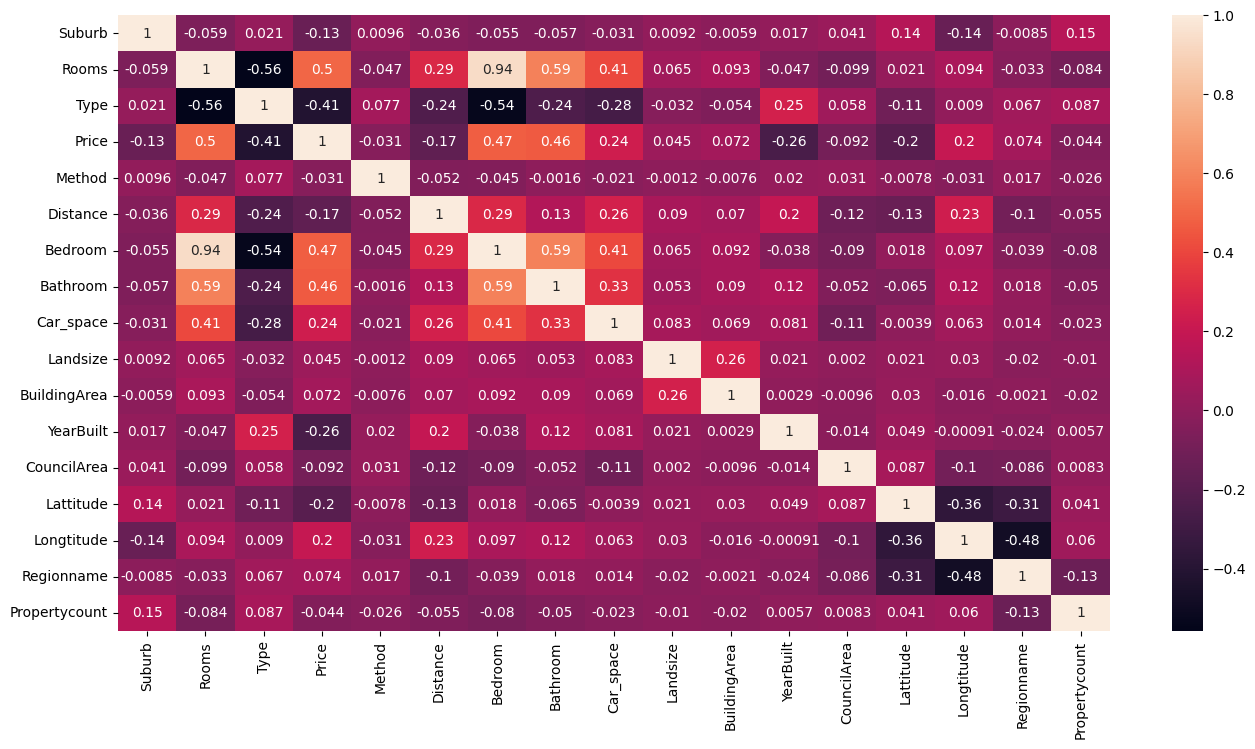

In [13]:
#visual presentation of correlation
plt.subplots(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

## PART-1: PROPERTY PRICE PREDICTIVE MODEL

In [14]:
#Scaling the dataset
features=data[['Rooms','Type','Distance','Bedroom','Bathroom','Car_space','Landsize','BuildingArea','Propertycount','Method']]
y=data.Price
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(features)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [16]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=79)

In [17]:
len(x_train),len(x_test)

(12050, 3013)

The ML predictive models used includes-

Multiple Linear regrssion,

Random Forest,

Suppot Vector Machine,

XGB Regressor,

L1 regularization,

Neural Network Regressor

R-squared and Mean Squared Error for each model is analysed to compare the performance. 

## Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

reg_train_score=reg.score(x_train, y_train)
reg_test_score=reg.score(x_test, y_test)
reg_r2_score=r2_score(y_test,reg.predict(x_test))
reg_mse=mean_squared_error(y_test,reg.predict(x_test))

In [19]:
print('train_accuracy_reg:', reg_train_score)
print('test_accuracy_reg:', reg_test_score)
print('r2_score_reg:', reg_r2_score)
print('mse_reg:', reg_mse)

train_accuracy_reg: 0.4499364441940924
test_accuracy_reg: -1.1977840097254635
r2_score_reg: -1.1977840097254635
mse_reg: 867769130606.5148


## Random Forest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

rf_train_score=rf.score(x_train, y_train)
rf_test_score=rf.score(x_test, y_test)
rf_r2_score=r2_score(y_test,rf.predict(x_test))
rf_r2_score=r2_score(y_test,rf.predict(x_test))
rf_mse=mean_squared_error(y_test,rf.predict(x_test))

In [21]:
print('train_accuracy_rf:', rf_train_score)
print('test_accuracy_rf:', rf_test_score)
print('r2_score_rf:', rf_r2_score)
print('mse_rf:', rf_mse)

train_accuracy_rf: 0.9581840347154192
test_accuracy_rf: 0.7384730263282584
r2_score_rf: 0.7384730263282584
mse_rf: 103260845273.70322


## Support Vector Regressor

In [22]:
from sklearn.svm import SVR
vector=SVR()
vector.fit(x_train,y_train)

vector_train_score=vector.score(x_train, y_train)
vector_test_score=vector.score(x_test, y_test)
vector_r2_score=r2_score(y_test,vector.predict(x_test))
vector_mse=mean_squared_error(y_test,vector.predict(x_test))

In [23]:
print('train_accuracy_svr:', vector_train_score)
print('test_accuracy_svr:', vector_test_score)
print('r2_score_svr:', vector_r2_score)
print('mse_vector:', vector_mse)

train_accuracy_svr: -0.07077246247049152
test_accuracy_svr: -0.05418929416931961
r2_score_svr: -0.05418929416931961
mse_vector: 416234226497.2059


## XGB Regressor

In [24]:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(x_train, y_train)

xg_train_score = xg.score(x_train, y_train)
xg_test_score = xg.score(x_test, y_test)
xg_r2_score = r2_score(y_test, xg.predict(x_test))
xg_mse=mean_squared_error(y_test,xg.predict(x_test))

In [25]:
print('train_accuracy_xg:', xg_train_score)
print('test_accuracy_xg:', xg_test_score)
print('r2_score_xg:', xg_r2_score)
print('mse_xg:', xg_mse)

train_accuracy_xg: 0.9195426827041849
test_accuracy_xg: 0.8024470414769852
r2_score_xg: 0.8024470414769852
mse_xg: 78001458882.06535


## L1 Regularization- Lasso

In [26]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=50,max_iter=500,tol=0.1)
lasso_reg.fit(x_train,y_train)

lasso_reg_train_score=lasso_reg.score(x_train, y_train)
lasso_reg_test_score=lasso_reg.score(x_test, y_test)
lasso_reg_r2_score=r2_score(y_test,lasso_reg.predict(x_test))
lasso_reg_mse=mean_squared_error(y_test,lasso_reg.predict(x_test))

In [27]:
print('train_accuracy_lasso_reg:', lasso_reg_train_score)
print('test_accuracy_lasso_reg:', lasso_reg_test_score)
print('r2_score_lasso_reg:', lasso_reg_r2_score)
print('mse_lasso_reg:', lasso_reg_mse)

train_accuracy_lasso_reg: 0.4499355883551944
test_accuracy_lasso_reg: -1.184929746544141
r2_score_lasso_reg: -1.184929746544141
mse_lasso_reg: 862693776187.6624


## Neural Network Regressor

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [29]:
tf_model=Sequential()
tf_model.add(Dense(units=32,activation='relu',input_dim=len(features.columns)))
tf_model.add(Dense(units=32,activation='relu'))
tf_model.add(Dense(units=1,activation='linear'))

In [30]:
tf_model.compile(loss='mean_squared_error',optimizer='Adam')

In [31]:
history=tf_model.fit(x_train,y_train,epochs=500,verbose=0)

In [32]:
y_predicted_train=tf_model.predict(x_train)

377/377 [==============================] - 0s 1ms/step


In [33]:
y_predicted_test=tf_model.predict(x_test)

95/95 [==============================] - 0s 1ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

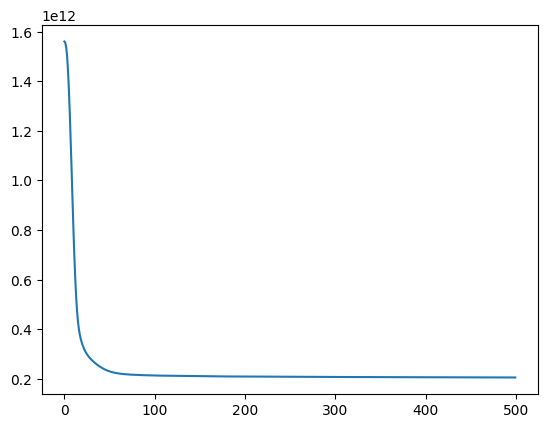

In [34]:
plt.plot(history.history['loss'])
plt.show

In [35]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,tf_model.predict(x_test))
print("Mean Squared Error:", mse)
tf_model_r2_score=r2_score(y_test,tf_model.predict(x_test))
print("r2_score_tf_model",tf_model_r2_score)

95/95 [==============================] - 0s 1ms/step
Mean Squared Error: 863492277269.3823
95/95 [==============================] - 0s 1ms/step
r2_score_tf_model -1.186952096553211


## COMPARING REGRESSION MODELS

In [36]:
comparing_model = pd.DataFrame({
    'model': ['linear', 'random_forest', 'svr', 'xgb', 'Lasso', 'tf_model'],
    'r2': [reg_r2_score, rf_r2_score, vector_r2_score, xg_r2_score, lasso_reg_r2_score, tf_model_r2_score],
    'mse': [reg_mse,rf_mse,vector_mse,xg_mse,lasso_reg_mse,mse]
})

comparing_model

,model,r2,mse
0,linear,-1.197784,8.677691e+11
1,random_forest,0.738473,1.032608e+11
2,svr,-0.054189,4.162342e+11
3,xgb,0.802447,7.800146e+10
4,Lasso,-1.184930,8.626938e+11
5,tf_model,-1.186952,8.634923e+11


In [37]:
comparing_model.sort_values('mse',ascending=True,inplace=True)

In [38]:
comparing_model.sort_values('r2',ascending=False)

,model,r2,mse
3,xgb,0.802447,7.800146e+10
1,random_forest,0.738473,1.032608e+11
2,svr,-0.054189,4.162342e+11
4,Lasso,-1.184930,8.626938e+11
5,tf_model,-1.186952,8.634923e+11
0,linear,-1.197784,8.677691e+11


By comparing the performance of all the ML models, we can come to a conclusion that the best model which gives the highest R-squared and lowest Mean Squared Error is XGB Regressor with R-squared score of 80.24%. 

In [39]:
import joblib
joblib.dump(xg,'property_price_prediction_joblib')

['property_price_prediction_joblib']

## PART-2: CLASSIFICATION MODEL

This part consist of classifying the house into various types using some of the features

The ML classification models used includes-

Logistic regrssion,

K Nearest Neighbor

Random Forest

XGB Regressor,

Accuracy score, confusion matrix and classification report for each model is analysed to compare the performance.

In [40]:
model_features=data[['Rooms','Distance','Bedroom','Bathroom','Car_space','Landsize','BuildingArea','Propertycount','Method']]
y=data.Type

In [41]:
#scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(model_features)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [43]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=46)

In [44]:
len(x_train),len(x_test)

(12050, 3013)

## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

#Train score
log_train_score=log.score(x_train,y_train)
log_train_score

0.7751867219917012

In [46]:
#Test score
log_test_score=log.score(x_test,y_test)
log_test_score

0.787255227348158

Confusion Matrix:
[[1842    3  223]
 [ 183    0   63]
 [ 168    1  530]]


Text(50.722222222222214, 0.5, 'Truth')

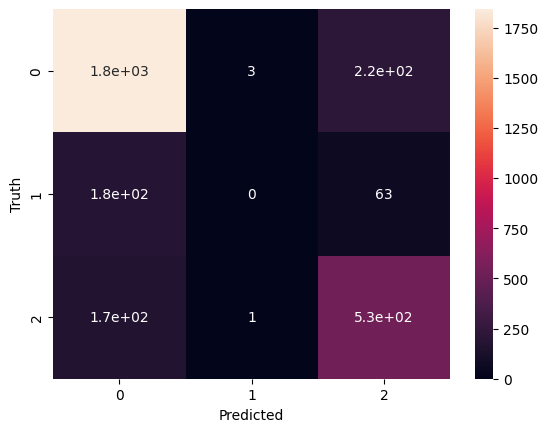

In [47]:
#confusion matrix
matrix=confusion_matrix(y_test,log.predict(x_test))
print('Confusion Matrix:')
print(matrix)

sns.heatmap(matrix,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
#Classification report
print(classification_report(y_test,log.predict(x_test)))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      2068
           1       0.00      0.00      0.00       246
           2       0.65      0.76      0.70       699

    accuracy                           0.79      3013
   macro avg       0.50      0.55      0.52      3013
weighted avg       0.73      0.79      0.76      3013



## K Nearest Neighbor

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

#Train score
knn_train_score=accuracy_score(y_train,knn.predict(x_train))
knn_train_score

0.8393360995850623

In [50]:
#Test score
knn_test_score=accuracy_score(y_test,knn.predict(x_test))
knn_test_score

0.7985396614669764

Confusion Matrix:
[[1924   53   91]
 [ 174   23   49]
 [ 205   35  459]]


Text(50.722222222222214, 0.5, 'Truth')

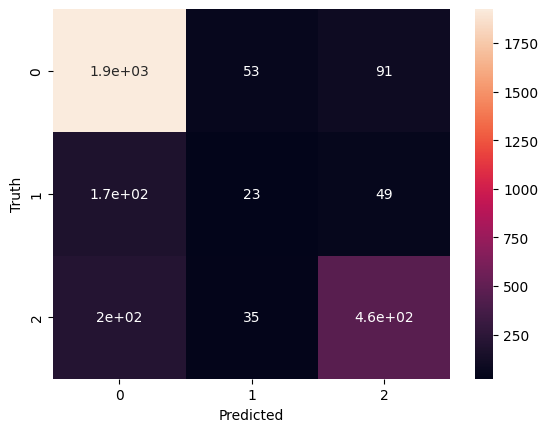

In [51]:
#confusion matrix
matrix=confusion_matrix(y_test,knn.predict(x_test))
print('Confusion Matrix:')
print(matrix)

sns.heatmap(matrix,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
print(classification_report(y_test,knn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      2068
           1       0.21      0.09      0.13       246
           2       0.77      0.66      0.71       699

    accuracy                           0.80      3013
   macro avg       0.60      0.56      0.57      3013
weighted avg       0.77      0.80      0.78      3013



## Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

#Train score
rf_train_score=accuracy_score(y_train,rf.predict(x_train))
rf_train_score

0.9965145228215767

In [54]:
#Test score
rf_test_score=accuracy_score(y_test,rf.predict(x_test))
rf_test_score

0.8645867905741785

Confusion Matrix:
[[1953   38   77]
 [ 114   86   46]
 [ 107   26  566]]


Text(50.722222222222214, 0.5, 'Truth')

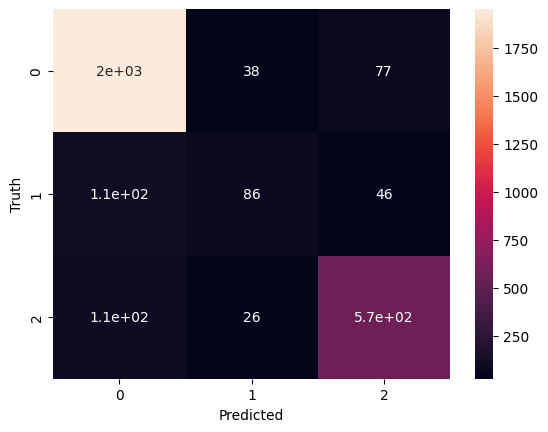

In [55]:
#confusion matrix
matrix=confusion_matrix(y_test,rf.predict(x_test))
print('Confusion Matrix:')
print(matrix)

sns.heatmap(matrix,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [56]:
#Classification report
print(classification_report(y_test,rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2068
           1       0.57      0.35      0.43       246
           2       0.82      0.81      0.82       699

    accuracy                           0.86      3013
   macro avg       0.76      0.70      0.72      3013
weighted avg       0.85      0.86      0.86      3013



## XGB Classifier

In [57]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

#Train score
xgb_train_score=accuracy_score(y_train,xgb.predict(x_train))
xgb_train_score

0.9496265560165975

In [58]:
#Test score
xgb_test_score=accuracy_score(y_test,xgb.predict(x_test))
xgb_test_score

0.8682376369067375

Confusion Matrix:
[[1942   54   72]
 [  98  102   46]
 [  91   36  572]]


Text(50.722222222222214, 0.5, 'Truth')

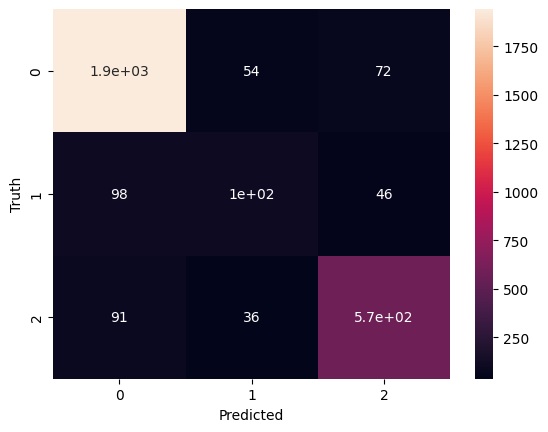

In [59]:
#confusion matrix
matrix=confusion_matrix(y_test,xgb.predict(x_test))
print('Confusion Matrix:')
print(matrix)

sns.heatmap(matrix,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [60]:
#Classification report
print(classification_report(y_test,xgb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2068
           1       0.53      0.41      0.47       246
           2       0.83      0.82      0.82       699

    accuracy                           0.87      3013
   macro avg       0.76      0.72      0.74      3013
weighted avg       0.86      0.87      0.86      3013



## COMPARING CLASSIFICATION MODEL

In [61]:
model_comparison=pd.DataFrame({
    'model':['Log','knn','rf','xgb'],
    'train_score':[log_train_score,knn_train_score,rf_train_score,xgb_train_score],
    'test_score':[log_test_score,knn_test_score,rf_test_score,xgb_test_score]
})
model_comparison

,model,train_score,test_score
0,Log,0.775187,0.787255
1,knn,0.839336,0.798540
2,rf,0.996515,0.864587
3,xgb,0.949627,0.868238


In [62]:
model_comparison.sort_values('test_score',ascending=False)

,model,train_score,test_score
3,xgb,0.949627,0.868238
2,rf,0.996515,0.864587
1,knn,0.839336,0.798540
0,Log,0.775187,0.787255


By comparing the performance of all the ML models, we can come to a conclusion that the best model which gives the highest accuracy score and a descent precision and recall is XGB Regressor with an accuracy score of 87%.

In [63]:
joblib.dump(xgb,'Property_type_classification_joblib')

['Property_type_classification_joblib']

## PART-3: CLUSTER ANALYSIS

This part consist of clustering the properties based on their location- lattitide and longtitude

## K Means Clustering

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

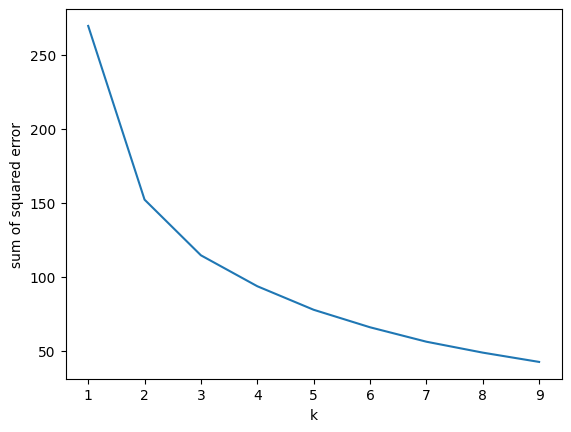

In [64]:
from sklearn.cluster import KMeans
k_range=range(1,10)
sse=[]

for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(data[['Longtitude', 'Lattitude']])
    sse.append(km.inertia_)
    
sse

plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_range,sse)


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


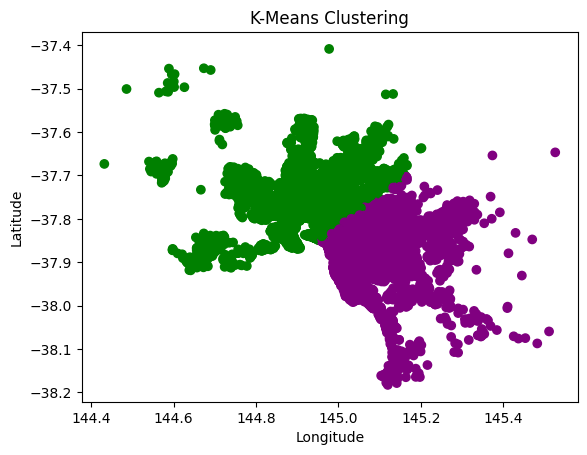

In [65]:
cluster_features = data[['Longtitude', 'Lattitude']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_features)

# Assign different colors to different clusters
colors = ['green','purple']

# Plot the clusters
plt.scatter(data['Longtitude'], data['Lattitude'], c=[colors[label] for label in kmeans.labels_])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering')
plt.show()

2 clusters can be formed based on the location of the properties